In [1]:
from common import images_generator
import pandas as pd
from settings import CAMERA_OFFSET, WEIGHT_NORMALIZER_BINS
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

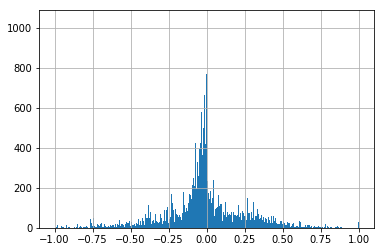

In [3]:
pd.Series(x['angle'] for x in images_generator()).hist(bins=400)

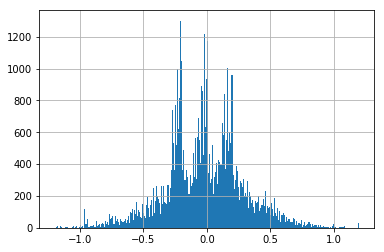

In [4]:
angles_all_cameras = []
for x in images_generator():
    angles_all_cameras.append(x['angle'])
    angles_all_cameras.append(x['angle'] + CAMERA_OFFSET)
    angles_all_cameras.append(x['angle'] - CAMERA_OFFSET)

pd.Series(angles_all_cameras).hist(bins=400)

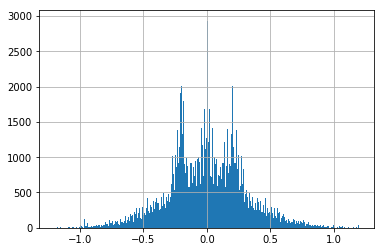

In [5]:
angles_all_cameras_flipped = []
for x in angles_all_cameras:
    angles_all_cameras_flipped.append(x)
    angles_all_cameras_flipped.append(-x)
    
pd.Series(angles_all_cameras_flipped).hist(bins=400)

In [6]:
from common import WeightNormalizer

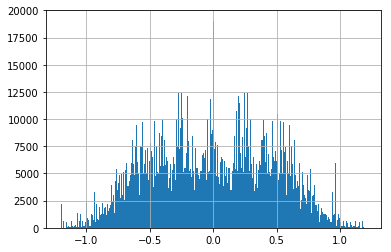

In [7]:
normalizer = WeightNormalizer(20).fit(angles_all_cameras_flipped)

pd.Series(angles_all_cameras_flipped).hist(weights=[normalizer.get_weight(x) for x in angles_all_cameras_flipped], bins=400)


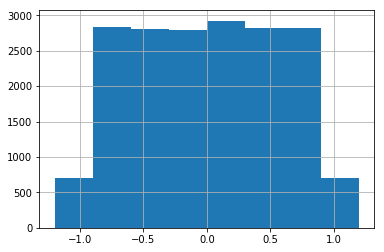

In [12]:
normalizer = WeightNormalizer(8, 4).fit(angles_all_cameras_flipped)

pd.Series([x for x in angles_all_cameras_flipped if normalizer.random_keep(x)]).hist(bins=8)

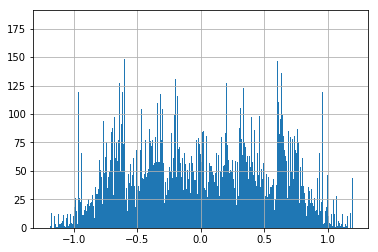

In [13]:
pd.Series([x for x in angles_all_cameras_flipped if normalizer.random_keep(x)]).hist(bins=400)